Step 1: Import the necessary libraries and modules


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

Step 2: Load the dataset


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
train_data = pd.read_csv('/content/drive/MyDrive/Adult_TrainDataset.csv')
test_data = pd.read_csv('/content/drive/MyDrive/Adult_TestDataset.csv')

Step 3: Visualize the training dataset


These commands are using the Seaborn library to create data visualizations of the train_data DataFrame.

The first command, `sns.pairplot(train_data, hue='income')`, creates a grid of scatter plots that show the pairwise relationships between different variables in train_data. The hue parameter is used to specify a categorical variable in the DataFrame that determines the color of the markers in the plot. In this case, the income column is used as the categorical variable, so each marker is colored according to whether the corresponding individual earns more or less than $50K per year. This visualization can help us understand how different variables are related to each other and how they are related to the target variable (income).

The second command, `sns.countplot(x='income', data=train_data)`, creates a bar plot that shows the frequency of each category in the income column. This visualization can help us understand the distribution of the target variable and whether it is imbalanced (i.e., whether one category is much more common than the other).

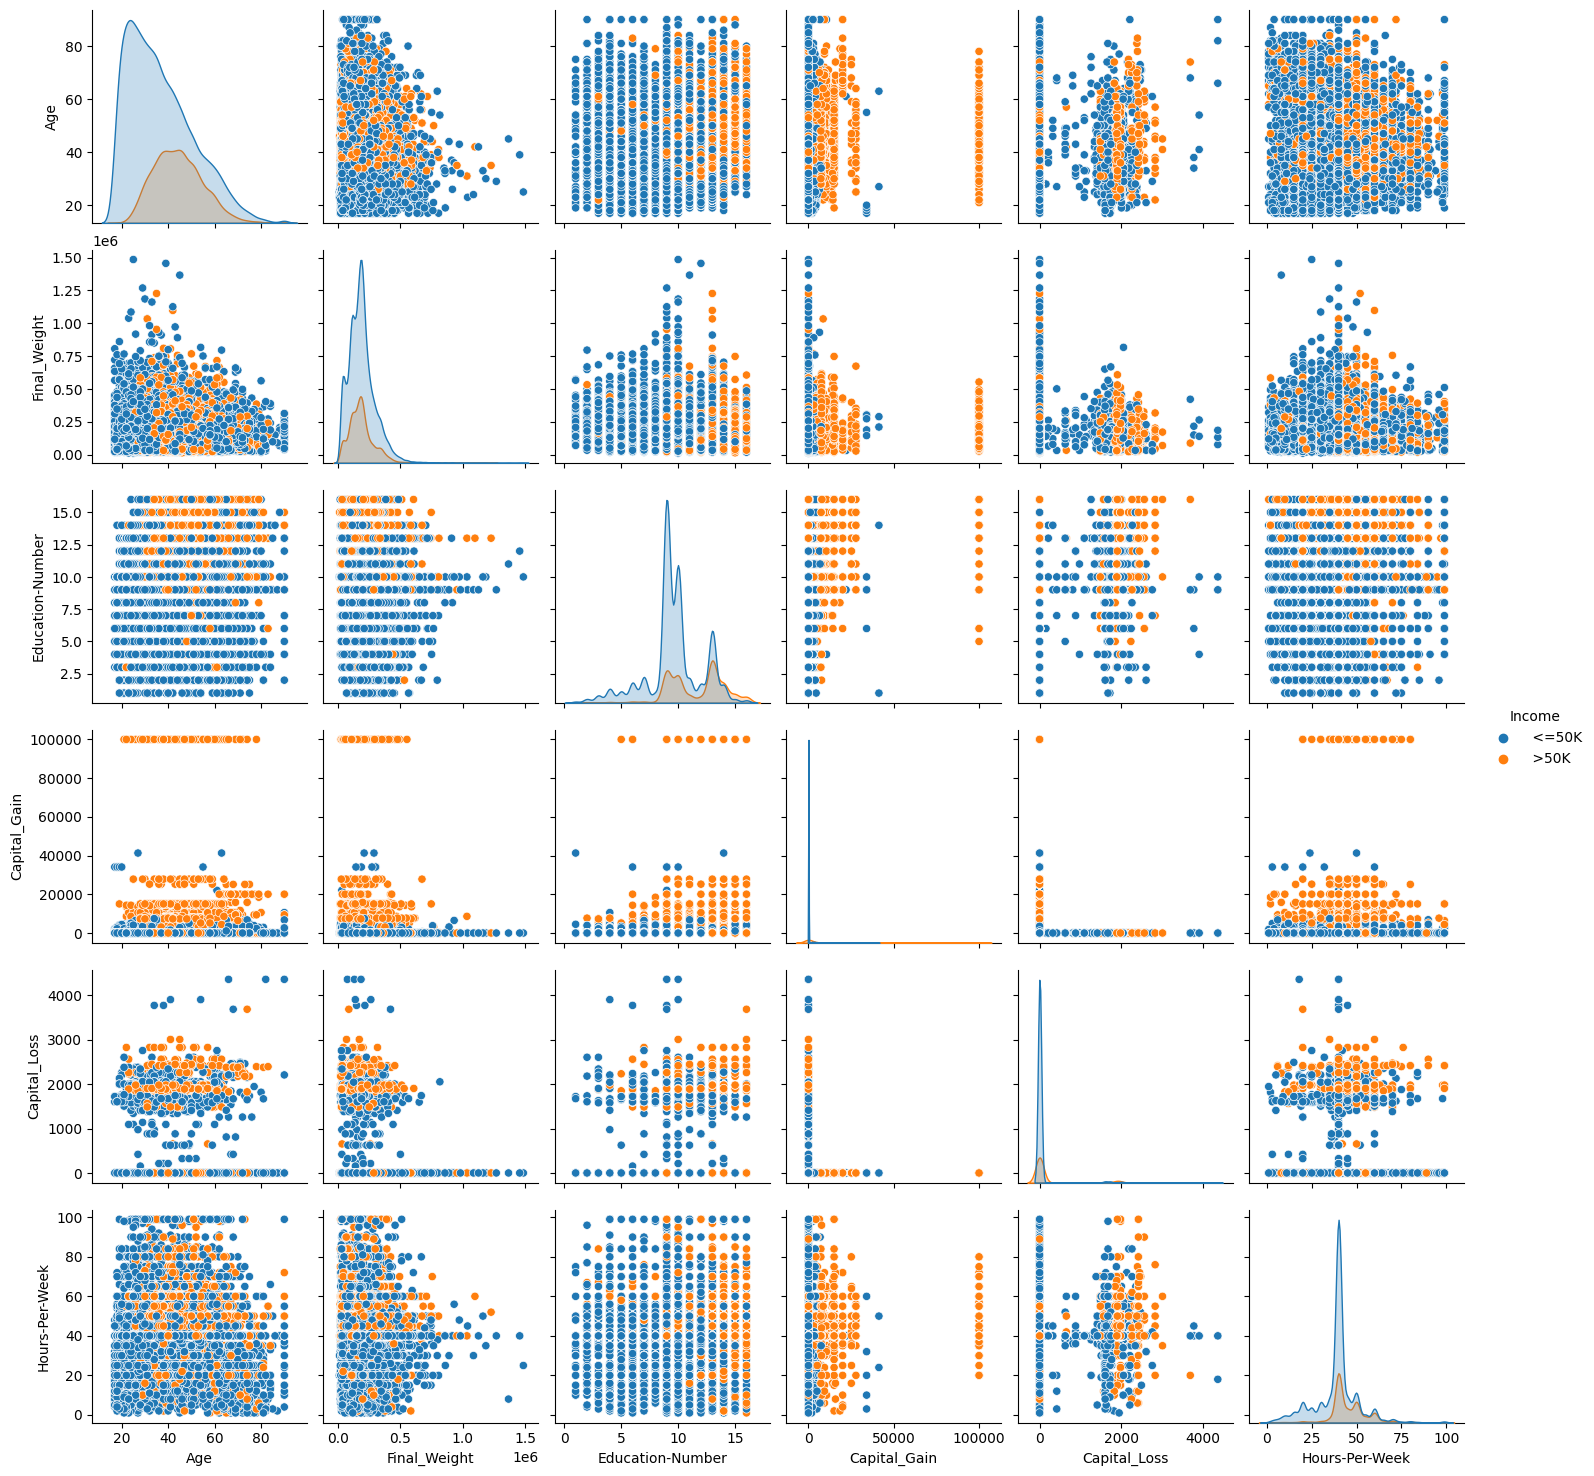

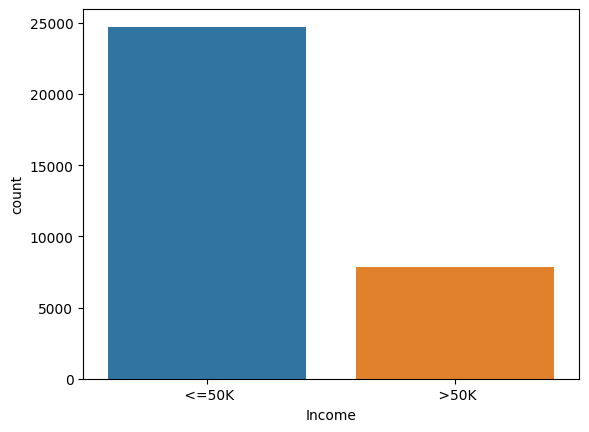

In [ ]:
sns.pairplot(train_data, hue='Income')
plt.show()

sns.countplot(x='Income', data=train_data)
plt.show()

Step 4: Handle missing values


This code replaces all occurrences of the string `'?'` in the `train_data` and `test_data` datasets with `NaN` values using the `replace()` method from pandas library.

The `NaN` represent missing or null values in the dataset. Replacing the `'?'` values with `NaN` values allows us to handle missing values in the dataset.
After replacing the `'?'` values with `NaN` values, the `dropna()` method is used to remove any rows that contain missing values. The `inplace=True` parameter is used to modify the original dataset instead of creating a new copy.

By removing the rows with missing values, we can ensure that the dataset is clean and ready for further processing. This is an important step in data preprocessing as missing values can cause issues during model training and evaluation.

In [ ]:
train_data.replace('?', np.nan, inplace=True)
train_data.dropna(inplace=True)

test_data.replace('?', np.nan, inplace=True)
test_data.dropna(inplace=True)

Step 5: Encode categorical values

This code applies the `LabelEncoder() `function from scikit-learn to encode categorical variables in train_data and test_data.

The code first creates an instance of the `LabelEncoder()` class and assigns it to the variable encoder.

Then, for each column in train_data, the code checks if the data type of the column is 'object', which is typically the data type of a categorical variable in pandas. If the column is categorical, the code applies the `fit_transform()` method of the encoder object to the column in train_data and the `transform()` method to the corresponding column in test_data. The `fit_transform()` method fits the encoder to the unique categories in the column and transforms the categories into integer labels, while the `transform()` method only transforms the categories into integer labels using the fitted encoder.

In [ ]:
# Choose between OneHotEncoder and LabelEncoder
# If an error occurs run this cell again
encoder = LabelEncoder()

for col in train_data.columns:
    if train_data[col].dtype == 'object':
        train_data[col] = encoder.fit_transform(train_data[col])
        test_data[col] = encoder.transform(test_data[col])

**Label encoding** is a technique where each category is assigned a unique integer label.

For example, if we have a categorical variable "color" with categories "red", "green", and "blue", we can encode them as 0, 1, and 2 respectively. Label encoding can be useful when the categories have an inherent ordering (e.g., "low", "medium", and "high"), but it may not be appropriate for categories with no meaningful order.

**One hot encoding**, on the other hand, is a technique where each category is represented by a binary vector. Each vector has length equal to the number of categories, and the position corresponding to the category is set to 1, while all other positions are set to 0.

For example, the "color" variable with categories "red", "green", and "blue" can be one hot encoded as [1, 0, 0], [0, 1, 0], and [0, 0, 1] respectively. One hot encoding is useful when there is no inherent ordering among the categories.

Step 6: Pre-processing (normalization and standardization):

This code block performs feature scaling on the numerical features in the `train_data` and `test_data` datasets using the `StandardScaler` class from the scikit-learn library.

The `StandardScaler` class is used to perform feature scaling. The `fit_transform()`  method is used to fit the scaler to the numerical features in the `train_data` dataset and transform the features into a standardized format. The transformed features are then assigned to the `X_train` variable.

The `drop()` method is used to remove the `Income` column from the `train_data` and `test_data` datasets. The `Income` column contains the target variable that we want to predict, and we don't want to include it in the feature set.

The `transform()` method is then used to transform the numerical features in the `test_data` dataset into a standardized format using the same scaling scheme that was learned from the `train_data` dataset. The transformed features are then assigned to the `X_test` variable.

The target variable `Income` is assigned to the `y_train` and `y_test` variables for the training and testing datasets, respectively. These variables will be used to train and evaluate the machine learning models.

In [ ]:
scaler = StandardScaler()
X_train = scaler.fit_transform(train_data.drop('Income', axis=1))
y_train = train_data['Income']
X_test = scaler.transform(test_data.drop('Income', axis=1))
y_test = test_data['Income']

Step 7: Train and evaluate KNN model

This code block trains a K-Nearest Neighbors (KNN) classifier on the standardized training data and evaluates its performance on the standardized testing data.

The `fit_transform()` method of the `LabelEncoder` class is used to transform the categorical target variable `y_test` into numerical values. This is necessary because machine learning algorithms require numerical values as input.
The `KNeighborsClassifier()` class is used to create a KNN classifier object. The default value of `n_neighbors` is 5, which means that the classifier will consider the 5 nearest neighbors to make a prediction.

The `fit()` method is used to train the KNN classifier on the standardized training data (`X_train` and `y_train`).

The `predict()` method is used to make predictions on the standardized testing data (`X_test`). The predicted values are assigned to the `y_pred_knn` variable.

The `confusion_matrix()` function from the scikit-learn library is used to compute the confusion matrix for the KNN classifier. The confusion matrix is a table that summarizes the performance of the classifier by comparing the predicted labels to the true labels.

The `accuracy_score(), precision_score(), recall_score(), and f1_score()` functions from the scikit-learn library are used to compute the evaluation metrics for the KNN classifier. These metrics provide a quantitative measure of the performance of the classifier.

The `ConfusionMatrixDisplay()` class from the scikit-learn library is used to create a visual representation of the confusion matrix. The `plot()` method is used to display the confusion matrix.

The `classification_report()` function from the scikit-learn library is used to generate a report that summarizes the precision, recall, F1-score, and support for each class in the target variable.
This report provides a more detailed analysis of the performance of the classifier.

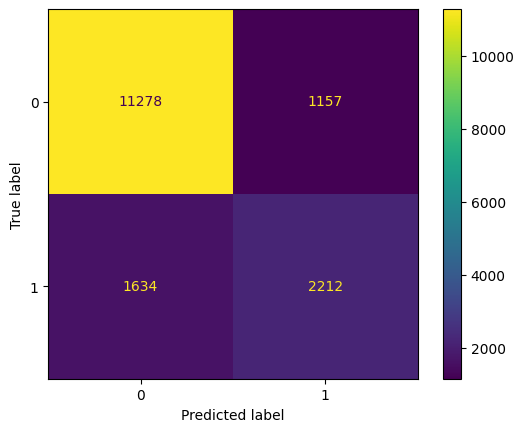

              precision    recall  f1-score   support

           0       0.87      0.91      0.89     12435
           1       0.66      0.58      0.61      3846

    accuracy                           0.83     16281
   macro avg       0.77      0.74      0.75     16281
weighted avg       0.82      0.83      0.82     16281



In [ ]:
y_test = encoder.fit_transform(y_test)
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)

cm_knn = confusion_matrix(y_test, y_pred_knn)
acc_knn = accuracy_score(y_test, y_pred_knn)
prec_knn = precision_score(y_test, y_pred_knn)
rec_knn = recall_score(y_test, y_pred_knn)
f1_knn = f1_score(y_test, y_pred_knn)

color = 'white'
disp = ConfusionMatrixDisplay(confusion_matrix=cm_knn)
disp.plot()
plt.show()

print(classification_report(y_test, y_pred_knn))

Step 8: Train and evaluate SVM model


The `SVC()` class is used to create an SVM classifier object. The default kernel used by the `SVC()` class is the Radial Basis Function (RBF) kernel.

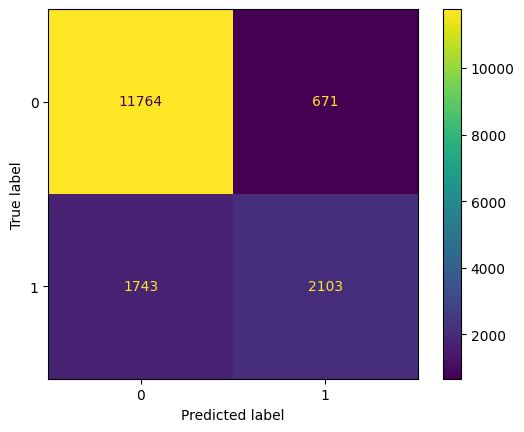

              precision    recall  f1-score   support

           0       0.87      0.95      0.91     12435
           1       0.76      0.55      0.64      3846

    accuracy                           0.85     16281
   macro avg       0.81      0.75      0.77     16281
weighted avg       0.84      0.85      0.84     16281



In [ ]:
svm = SVC()
svm.fit(X_train, y_train)
y_pred_svm = svm.predict(X_test)

cm_svm = confusion_matrix(y_test, y_pred_svm)
acc_svm = accuracy_score(y_test, y_pred_svm)
prec_svm = precision_score(y_test, y_pred_svm)
rec_svm = recall_score(y_test, y_pred_svm)
f1_svm = f1_score(y_test, y_pred_svm)


disp = ConfusionMatrixDisplay(confusion_matrix=cm_svm)
disp.plot()
plt.show()

print(classification_report(y_test, y_pred_svm))

Step 9: Train and evaluate Decision Tree model


Same as KNN and SVM

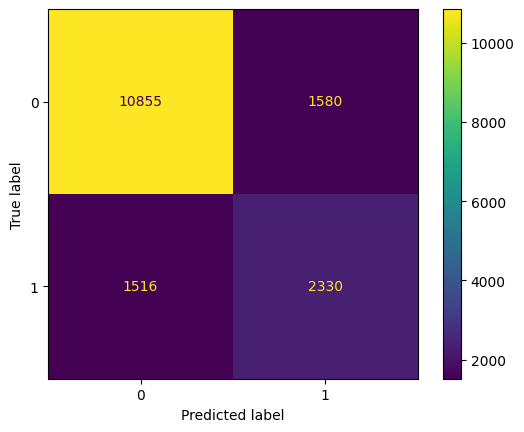

              precision    recall  f1-score   support

           0       0.88      0.87      0.88     12435
           1       0.60      0.61      0.60      3846

    accuracy                           0.81     16281
   macro avg       0.74      0.74      0.74     16281
weighted avg       0.81      0.81      0.81     16281



In [ ]:
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)

cm_dt = confusion_matrix(y_test, y_pred_dt)
acc_dt = accuracy_score(y_test, y_pred_dt)
prec_dt = precision_score(y_test, y_pred_dt)
rec_dt = recall_score(y_test, y_pred_dt)
f1_dt = f1_score(y_test, y_pred_dt)

disp = ConfusionMatrixDisplay(confusion_matrix=cm_dt)
disp.plot()
plt.show()

print(classification_report(y_test, y_pred_dt))

Step 10: Compare the performance of the models

In [ ]:
print("KNN Model:")
print("Accuracy:", acc_knn)
print("Precision:", prec_knn)
print("Recall:", rec_knn)
print("F1 Score:", f1_knn)

print("\nSVM Model:")
print("Accuracy:", acc_svm)
print("Precision:", prec_svm)
print("Recall:", rec_svm)
print("F1 Score:", f1_svm)

print("\nDecision Tree Model:")
print("Accuracy:", acc_dt)
print("Precision:", prec_dt)
print("Recall:", rec_dt)
print("F1 Score:", f1_dt)

KNN Model:
Accuracy: 0.8285731834653891
Precision: 0.6565746512318196
Recall: 0.5751430057202288
F1 Score: 0.6131670131670132

SVM Model:
Accuracy: 0.8517290092746146
Precision: 0.7581110310021629
Recall: 0.546801872074883
F1 Score: 0.6353474320241691

Decision Tree Model:
Accuracy: 0.8097168478594681
Precision: 0.5951653944020356
Recall: 0.608164326573063
F1 Score: 0.6015946502057613


Based on the evaluation metrics, the SVM model has the highest accuracy (0.8517) among the three models, followed by the KNN model (0.8286) and the Decision Tree model (0.8087).

In terms of precision, the SVM model has the highest value (0.7581), followed by the KNN model (0.6566) and the Decision Tree model (0.5926).

In terms of recall, the KNN model has the highest value (0.5751), followed by the Decision Tree model (0.6079) and the SVM model (0.5468).

In terms of F1 score, the SVM model has the highest value (0.6353), followed by the KNN model (0.6132) and the Decision Tree model (0.6002).

Overall, the SVM model performs the best among the three models in terms of accuracy and F1 score, while the KNN model performs the best in terms of recall. However, the choice of the best model depends on the specific requirements of the problem and the trade-offs between different evaluation metrics.